<a href="https://colab.research.google.com/github/gz54054/Homework/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

### Exercise 1

Go to http://freesound.org and download a sound sample that
includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is
constant.  Compute and plot the spectrum of the segment you selected.
What connection can you make between the timbre of the sound and the
harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to
filter out some of the harmonics.  Then convert the spectrum back
to a wave and listen to it.  How does the sound relate to the
changes you made in the spectrum?

##### Solution

我選擇的音檔來源:https://freesound.org/people/josefpres/sounds/577008/

感謝josefpres提供的音檔

In [ ]:
if not os.path.exists('577008__josefpres__dark-loops-205-octave-piano-with-melody-and-efect-short-loop-60-bpm.wav'):
    !wget https://hub.gke2.mybinder.org/user/jupyterlab-jupyterlab-demo-36hv2lm7/doc/tree/demo/577008__josefpres__dark-loops-205-octave-piano-with-melody-and-efect-short-loop-60-bpm.wav

In [ ]:
from thinkdsp import read_wave

wave = read_wave('577008__josefpres__dark-loops-205-octave-piano-with-melody-and-efect-short-loop-60-bpm.wav')
wave.normalize()
wave.make_audio()

這是整個波的樣子：

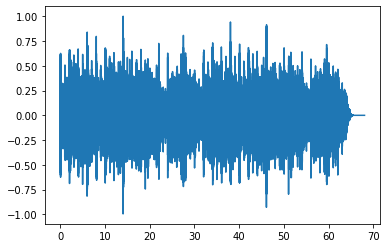

In [ ]:
wave.plot()

我選擇最一開始的一個片段來處理

In [ ]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

下面是該段的樣子：

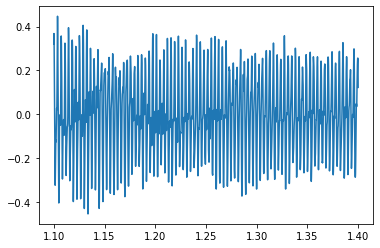

In [ ]:
segment.plot()

這是一個更短的段，因此您可以看到波形：

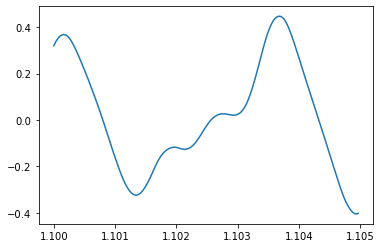

In [ ]:
segment.segment(start=1.1, duration=0.005).plot()

這是頻譜的樣子：

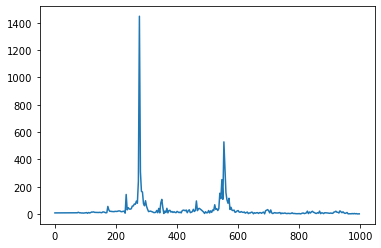

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

peaks以降序打印頻譜中的最高點及其頻率：

In [ ]:
spectrum.peaks()[:30]

[(1447.5700108957758, 276.6666666666667),
 (528.2465340383693, 553.3333333333334),
 (338.72765983338974, 556.6666666666667),
 (309.6282201392933, 280.0),
 (252.2965903417634, 546.6666666666667),
 (240.3254379406633, 273.33333333333337),
 (165.8126239923871, 283.33333333333337),
 (161.60981299395974, 286.6666666666667),
 (157.01721353419148, 560.0),
 (152.65774282658847, 540.0),
 (143.57066420372408, 233.33333333333334),
 (115.83127652191612, 570.0),
 (112.86906257158026, 543.3333333333334),
 (108.21431499945888, 550.0),
 (107.50707010175202, 350.0),
 (104.17142499743143, 563.3333333333334),
 (97.71274507527382, 296.6666666666667),
 (96.12667832088174, 463.33333333333337),
 (94.70297414322081, 266.6666666666667),
 (81.46389806287144, 346.6666666666667),
 (79.57519528524345, 566.6666666666667),
 (79.38148651822097, 270.0),
 (78.60430399741385, 1110.0),
 (76.5505108154159, 290.0),
 (73.72918587636751, 260.0),
 (71.8413814391232, 263.33333333333337),
 (68.31532319587336, 523.3333333333334)

In [ ]:
spectrum.low_pass(2000)

這就是它的聲音：

In [ ]:
spectrum.make_wave().make_audio()

In [ ]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=2500, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=2500, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [ ]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

### Exercise 2

Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

### Solution

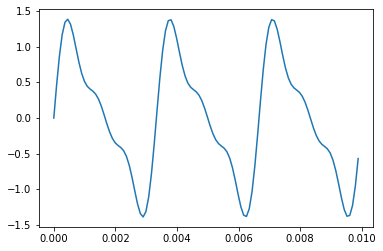

In [ ]:
from thinkdsp import SinSignal
from thinkdsp import CosSignal

signal = (SinSignal(freq=300, amp=1.0) +
          SinSignal(freq=600, amp=0.5) +
          SinSignal(freq=900, amp=0.25))
signal.plot()

我們可以用這個信號來製造一個波：

In [ ]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

聽起來像:

In [ ]:
wave2.make_audio()

這個波的頻譜:

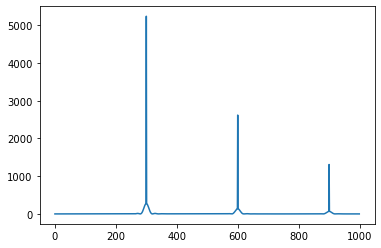

In [ ]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=1000)

In [ ]:
signal += CosSignal(freq=500)
signal.make_wave().make_audio()